In [6]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Création du classifieur Bagging avec KNeighborsClassifier comme modèle de base
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)


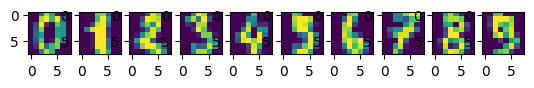

In [ ]:
from sklearn.datasets import load_digits
# Chargement du jeu de données "digits", qui contient des images de chiffres manuscrits (8x8 pixels)
digits = load_digits()

# Importation de matplotlib pour l'affichage des images
import matplotlib.pyplot as plt

# Création d'une figure pour afficher les images
fig = plt.figure()

# Boucle pour afficher les 10 premières images du jeu de données
for i, digit in enumerate(digits.images[:10]):
    # Ajout d'un sous-graphe dans la figure (1 ligne, 10 colonnes, à l'index i+1)
    fig.add_subplot(1, 10, i+1)
    # Affichage de l'image du chiffre
    plt.imshow(digit)
    # Optionnellement, on peut ajouter une étiquette ou personnaliser l'affichage ici, mais ce n'est pas nécessaire dans ce code.
    
# Affichage de la figure contenant les 10 premières images
plt.show()


In [11]:
import numpy as np
from sklearn import tree
from sklearn.ensemble import BaggingClassifier

# Assignation des données et des labels du jeu de données 'digits' à X et y
X, y = digits.data, digits.target

# Création d'un classifieur basé sur un arbre de décision
clf = tree.DecisionTreeClassifier()

# Entraînement de l'arbre de décision sur les données (X) et les labels (y)
clf.fit(X, y)

# Calcul de la précision du modèle sur les mêmes données d'entraînement
accuracy = clf.score(X, y)

# Affichage de la précision
print(accuracy)


1.0


In [38]:
from sklearn.model_selection import train_test_split

# Division des données : 90% des données pour l'entraînement, 10% pour le test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

# Création d'un classifieur basé sur un arbre de décision
clf = tree.DecisionTreeClassifier()

# Entraînement de l'arbre de décision sur les données d'entraînement
clf.fit(X_train, y_train)

# Prédiction des labels pour l'ensemble de test
Z = clf.predict(X_test)

# Calcul de la précision du modèle sur l'ensemble de test
accuracy = clf.score(X_test, y_test)

# Affichage de la précision
print(accuracy)


0.6489493201483313


In [19]:
# Définition du nombre d'itérations pour les tests
N = 100
# Liste pour stocker les précisions des différentes itérations
accuracies = []

# Boucle pour effectuer 100 évaluations sur des sous-ensembles de données
for i in range(N):
    # Division des données en ensembles d'entraînement (95%) et de test (5%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
    
    # Création d'un modèle d'arbre de décision
    clf = tree.DecisionTreeClassifier()
    
    # Entraînement du modèle sur l'ensemble d'entraînement
    clf.fit(X_train, y_train)
    
    # Prédiction des étiquettes pour l'ensemble de test
    Z = clf.predict(X_test)
    
    # Ajout de la précision du modèle à la liste des précisions
    accuracies.append(clf.score(X_test, y_test))
    
    # Affichage de la précision pour cette itération
    print(accuracies[i])

# Calcul et affichage de la moyenne et de l'écart type des précisions
print(np.mean(accuracies), np.std(accuracies))


0.9222222222222223
0.8555555555555555
0.8666666666666667
0.9
0.8666666666666667
0.8888888888888888
0.8666666666666667
0.8333333333333334
0.8111111111111111
0.9
0.9111111111111111
0.8666666666666667
0.8222222222222222
0.8888888888888888
0.8555555555555555
0.8888888888888888
0.8444444444444444
0.8666666666666667
0.8111111111111111
0.9222222222222223
0.8111111111111111
0.8444444444444444
0.8222222222222222
0.8888888888888888
0.8333333333333334
0.9444444444444444
0.8111111111111111
0.7777777777777778
0.8333333333333334
0.8666666666666667
0.8444444444444444
0.7888888888888889
0.8666666666666667
0.8333333333333334
0.8222222222222222
0.8444444444444444
0.8888888888888888
0.8666666666666667
0.9
0.8111111111111111
0.8333333333333334
0.9333333333333333
0.8555555555555555
0.8444444444444444
0.8
0.8555555555555555
0.8777777777777778
0.8333333333333334
0.8777777777777778
0.8111111111111111
0.8666666666666667
0.8111111111111111
0.8444444444444444
0.8555555555555555
0.8
0.8555555555555555
0.8
0.82222

In [39]:
# Création du modèle Bagging avec des arbres de décision
clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200)

In [40]:
# Entraînement du modèle sur l'ensemble d'entraînement
clf.fit(X_train, y_train)

# Prédiction des labels pour l'ensemble de test
Z = clf.predict(X_test)

# Calcul de la précision du modèle sur l'ensemble de test
accuracy = clf.score(X_test, y_test)


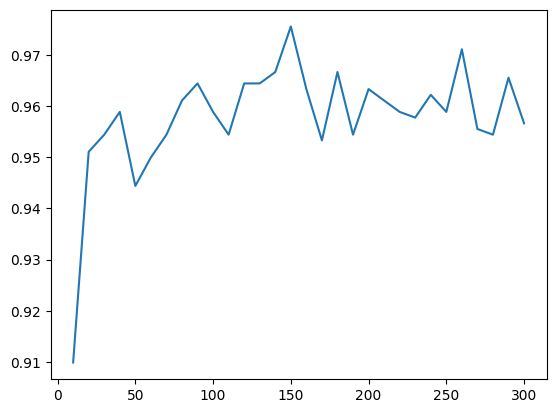

In [41]:
# Initialisation des variables
N = 30
accuracy = []

# Boucle pour expérimenter avec un nombre croissant d'estimateurs
for i in range(N):
    # Diviser les données en ensembles d'entraînement et de test (50% chacun)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    
    # Création du modèle Bagging avec des arbres de décision
    clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=(i+1)*10)
    
    # Entraînement du modèle
    clf.fit(X_train, y_train)
    
    # Prédiction sur l'ensemble de test
    Z = clf.predict(X_test)
    
    # Stockage de la précision
    accuracy.append(clf.score(X_test, y_test))

# Tracer la précision en fonction du nombre d'estimateurs
import matplotlib.pyplot as plt
plt.plot([10*(i+1) for i in range(N)], accuracy)
plt.show()

In [42]:
# Chargement du jeu de données "digits" contenant des images de chiffres manuscrits
digits = load_digits()
X, y = digits.data, digits.target  # X contient les caractéristiques (pixels des images) et y les labels (chiffres)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)  # Séparation des données en 50% pour l'entraînement et 50% pour le test

# Définition de la grille des hyperparamètres à tester
pgrid = {
    "max_samples": [0.2, 0.4, 0.6, 0.8],  # Proportions des échantillons à utiliser pour chaque arbre
    "max_features": [0.2, 0.4, 0.6, 0.8]  # Proportions des caractéristiques à utiliser pour chaque arbre
}

# Initialisation de GridSearchCV pour rechercher la meilleure combinaison des hyperparamètres
grid_search = GridSearchCV(
    BaggingClassifier(tree.DecisionTreeClassifier()),  # Modèle de bagging avec un arbre de décision comme classifieur de base
    param_grid=pgrid,  # Paramètres à tester
    cv=5  # Validation croisée avec 5 plis (folds) pour chaque combinaison de paramètres
)

# Entraînement du modèle en utilisant la recherche sur grille
grid_search.fit(X_train, y_train)

# Affichage des meilleurs résultats obtenus après la recherche sur grille
print("Meilleur score : " + str(grid_search.best_estimator_.score(X_test, y_test)))  # Précision du modèle sur l'ensemble de test
print("max_samples: " + str(grid_search.best_estimator_.max_samples))  # Meilleur paramètre 'max_samples'
print("max_features: " + str(grid_search.best_estimator_.max_features))  # Meilleur paramètre 'max_features'


Meilleur score : 0.9354838709677419
max_samples: 0.8
max_features: 0.6


In [43]:
# Chargement du jeu de données "digits" qui contient des images de chiffres manuscrits
digits = load_digits()

# "X" contient les caractéristiques (les pixels des images sous forme de vecteurs), 
# et "y" contient les labels (les chiffres associés aux images)
X, y = digits.data, digits.target  

# Importation de la fonction pour diviser les données en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split

# Séparation des données : 90% des données seront utilisées pour l'ensemble de test, 
# et seulement 10% pour l'entraînement. Cela n'est pas courant dans un cadre classique, 
# car il est souvent préférable d'avoir une proportion plus grande pour l'entraînement.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialisation du modèle RandomForest avec 200 arbres de décision (n_estimators=200)
clf = RandomForestClassifier(n_estimators=200)

# Entraînement du modèle sur les données d'entraînement (X_train, y_train)
clf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200)

In [45]:
# Prédiction des étiquettes pour les données de test (X_test) en utilisant le modèle entraîné (clf)
y_pred = clf.predict(X_test)

# Calcul de la précision du modèle sur l'ensemble de test en comparant les prédictions (y_pred) avec les vraies étiquettes (y_test)
accuracy = clf.score(X_test, y_test)

# Affichage de la précision du modèle sur l'ensemble de test
print(accuracy)


0.9184177997527813


In [46]:
# Initialisation d'un arbre de décision classique
clf = tree.DecisionTreeClassifier()

# Entraînement de l'arbre de décision avec les données d'entraînement
clf.fit(X_train, y_train)

# Prédiction des labels pour l'ensemble de test avec l'arbre de décision entraîné
Z = clf.predict(X_test)

# Affichage de la précision de l'arbre de décision sur l'ensemble de test
print("Arbre de décision : " + str(clf.score(X_test, y_test)))

# Initialisation du classifieur Bagging avec un arbre de décision comme base, 200 arbres et échantillons/caractéristiques à 50% 
clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200)

# Entraînement du modèle Bagging avec les données d'entraînement
clf.fit(X_train, y_train)

# Prédiction des labels pour l'ensemble de test avec le modèle Bagging entraîné
Z = clf.predict(X_test)

# Affichage de la précision du modèle Bagging sur l'ensemble de test
print("Bagging (200 arbres) : " + str(clf.score(X_test, y_test)))

# Initialisation du classifieur Forêt Aléatoire avec 200 arbres
clf = RandomForestClassifier(n_estimators=200)

# Entraînement du modèle Forêt Aléatoire avec les données d'entraînement
clf.fit(X_train, y_train)

# Prédiction des labels pour l'ensemble de test avec le modèle Forêt Aléatoire entraîné
Z = clf.predict(X_test)

# Affichage de la précision du modèle Forêt Aléatoire sur l'ensemble de test
print("Forêt aléatoire (200 arbres) : " + str(clf.score(X_test, y_test)))


Arbre de décision : 0.6996291718170581
Bagging (200 arbres) : 0.896168108776267
Forêt aléatoire (200 arbres) : 0.9079110012360939


In [29]:
# Nombre de répétitions pour obtenir des résultats robustes
N = 10

# Liste pour stocker les précisions de Bagging pour chaque itération
bagging_accuracies = []

# Boucle pour répéter l'expérimentation N fois
for i in range(N):
    # Séparation des données en ensembles d'entraînement et de test (50% pour l'entraînement, 50% pour le test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    
    # Initialisation du modèle Bagging avec des arbres de décision comme classifieurs de base (n_estimators=30)
    clf = BaggingClassifier(tree.DecisionTreeClassifier(), n_estimators=30)
    
    # Entraînement du modèle sur les données d'entraînement
    clf.fit(X_train, y_train)
    
    # Calcul de la précision du modèle sur l'ensemble de test et ajout à la liste des précisions
    bagging_accuracies.append(clf.score(X_test, y_test))

# Calcul de la moyenne et de l'écart-type des précisions obtenues lors des N itérations pour Bagging
print(np.mean(bagging_accuracies), np.std(bagging_accuracies))

# Liste pour stocker les précisions de la forêt aléatoire pour chaque itération
rf_accuracies = []

# Boucle pour répéter l'expérimentation N fois pour Random Forest
for i in range(N):
    # Séparation des données en ensembles d'entraînement et de test (50% pour l'entraînement, 50% pour le test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    
    # Initialisation du modèle Forêt Aléatoire (Random Forest) avec 30 arbres (n_estimators=30)
    clf = RandomForestClassifier(n_estimators=30)
    
    # Entraînement du modèle sur les données d'entraînement
    clf.fit(X_train, y_train)
    
    # Calcul de la précision du modèle sur l'ensemble de test et ajout à la liste des précisions
    rf_accuracies.append(clf.score(X_test, y_test))

# Calcul de la moyenne et de l'écart-type des précisions obtenues lors des N itérations pour Random Forest
print(np.mean(rf_accuracies), np.std(rf_accuracies))


0.9318131256952169 0.015187102060065292
0.9576195773081203 0.005010503060981174


10 0.9377085650723026
20 0.9588431590656284
30 0.9688542825361512
40 0.9610678531701891
50 0.9566184649610678
60 0.9666295884315906
70 0.9688542825361512
80 0.9688542825361512
90 0.9632925472747497
100 0.9655172413793104
110 0.9710789766407119
120 0.967741935483871
130 0.967741935483871
140 0.967741935483871
150 0.9699666295884316
160 0.9699666295884316
170 0.9688542825361512
180 0.9688542825361512
190 0.9688542825361512
200 0.9688542825361512
210 0.9721913236929922
220 0.967741935483871
230 0.9688542825361512
240 0.9710789766407119
250 0.9710789766407119
260 0.9688542825361512
270 0.9710789766407119
280 0.9699666295884316
290 0.9699666295884316
300 0.967741935483871


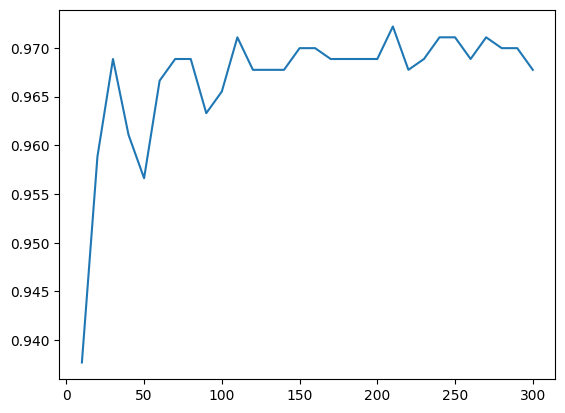

In [47]:
# Nombre d'itérations pour évaluer l'impact du nombre d'arbres sur la précision
N = 30

# Liste pour stocker les précisions obtenues à chaque itération
accuracy = []

# Séparation des données en ensembles d'entraînement et de test (50% pour l'entraînement, 50% pour le test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# Boucle pour répéter l'entraînement et l'évaluation du modèle pour différents nombres d'arbres (n_estimators)
for i in range(N):
    # Initialisation du modèle Forêt Aléatoire (Random Forest) avec un nombre d'arbres qui augmente à chaque itération
    clf = RandomForestClassifier(n_estimators=(i+1)*10)
    
    # Entraînement du modèle avec les données d'entraînement
    clf.fit(X_train, y_train)
    
    # Calcul de la précision du modèle sur l'ensemble de test et ajout à la liste des précisions
    accuracy.append(clf.score(X_test, y_test))
    
    # Affichage du nombre d'arbres et de la précision obtenue pour cette itération
    print((i+1)*10, accuracy[i])

# Traçage du graphique montrant l'évolution de la précision en fonction du nombre d'arbres
plt.plot([10*(i+1) for i in range(30)], accuracy)
plt.show()


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np

# Chargement du dataset des chiffres manuscrits (digits)
digits = load_digits()
X, y = digits.data, digits.target

# Séparation des données en ensembles d'entraînement (50%) et de test (50%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=0)

# Entraînement et évaluation d'un modèle de Forêt Aléatoire (Random Forest) avec 50 arbres
clf = RandomForestClassifier(n_estimators=50)
clf.fit(X_train, y_train)  # Entraînement sur les données d'entraînement
accuracy = clf.score(X_test, y_test)  # Évaluation de la précision sur les données de test
print("Forêt aléatoire : " + str(accuracy))  # Affichage de la précision de la Forêt Aléatoire

# Entraînement et évaluation d'un modèle ExtraTrees avec 50 arbres
clf = ExtraTreesClassifier(n_estimators=50)
clf.fit(X_train, y_train)  # Entraînement sur les données d'entraînement
accuracy = clf.score(X_test, y_test)  # Évaluation de la précision sur les données de test
print("Extra Trees : " + str(accuracy))  # Affichage de la précision du modèle Extra Trees


Forêt aléatoire : 0.9688542825361512
Extra Trees : 0.978865406006674


In [49]:
from sklearn.ensemble import AdaBoostClassifier

# Chargement du dataset des chiffres manuscrits (digits)
digits = load_digits()
X, y = digits.data, digits.target

# Séparation des données en ensembles d'entraînement (10%) et de test (90%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

# Initialisation du classifieur AdaBoost avec un arbre de décision comme classifieur de base
# 200 itérations (arbres de décision) et un taux d'apprentissage de 2
clf = AdaBoostClassifier(estimator=tree.DecisionTreeClassifier(max_depth=5), n_estimators=200, learning_rate=2)

# Entraînement du modèle AdaBoost sur les données d'entraînement
clf.fit(X_train, y_train)

# Calcul de la précision du modèle sur l'ensemble de test
accuracy = clf.score(X_test, y_test)

# Affichage de la précision obtenue
print(accuracy)

0.9289245982694685
